# Library

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings

from numpy import unique
from numpy import where
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans,MiniBatchKMeans,OPTICS,AffinityPropagation

In [11]:
warnings.filterwarnings("ignore")

### Importation des données 

In [12]:
df = pd.read_csv("CC GENERAL.csv")

### Exploration du dataset

In [13]:
print("--> Le nombre de lignes est :", df.shape[0])
print("--> Le nombre de colonnes est :", df.shape[1])
print("----------")
df.describe()

--> Le nombre de lignes est : 8950
--> Le nombre de colonnes est : 18
----------


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##### Informations générales 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Compter le nombre d'éléments distincts dans l'axe spécifié.

In [16]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

##### Calculer la corrélation par paires des colonnes, à l'exclusion des valeurs NA/null.

In [17]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


Text(0.5, 1.0, 'Color Masked Heatmap of Correlations')

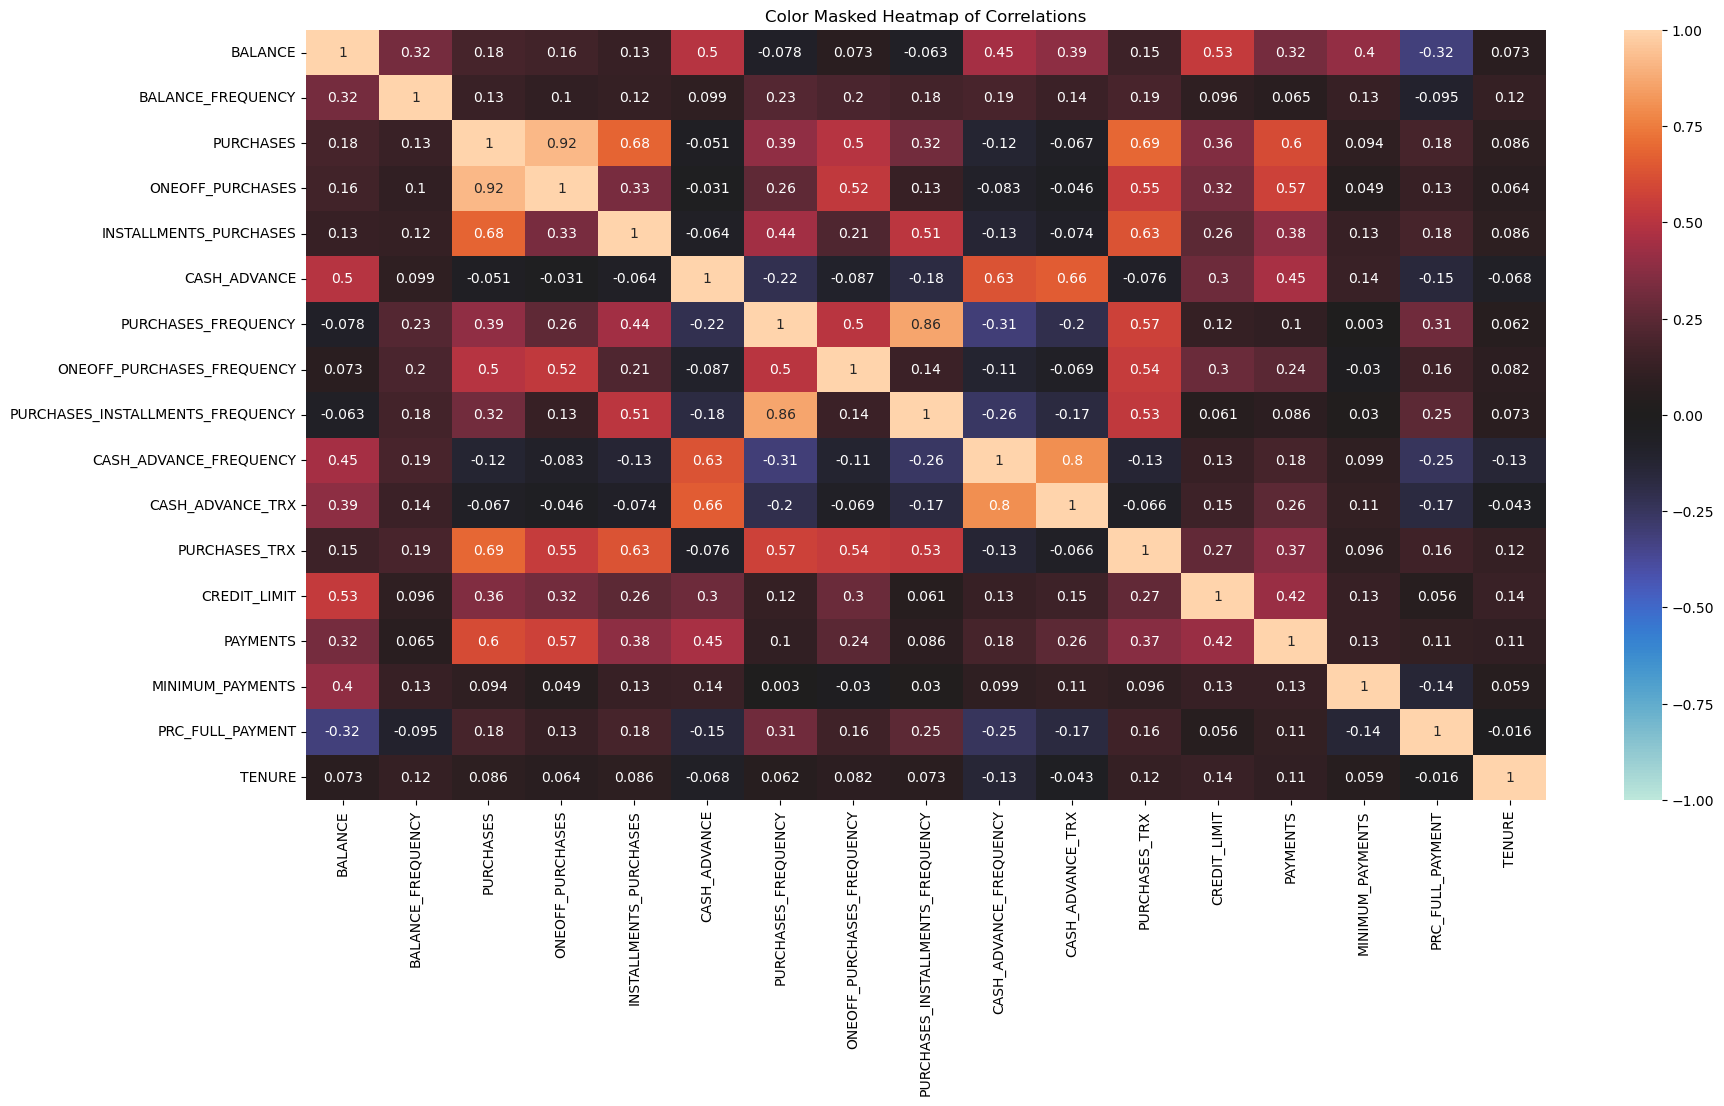

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,annot=True)
plt.title('Color Masked Heatmap of Correlations')

Les colonnes sont globalement non corrélées ou peu corrélées.

<span style="color:orange"> 
Valeurs manquantes dans les colonnes : MINIMUM_PAYMENTS et CREDIT_LIMIT </span>

### Prétraitement

##### Nettoyage des données 

In [19]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Seule ligne ayant des NA --> minimum_payments.
Il y a également un NA dans credit_limit.

On va regarder la variable minimum_payments.

In [20]:
sum(df.loc[:,"MINIMUM_PAYMENTS"].isna())/len(df.loc[:,"MINIMUM_PAYMENTS"])

0.034972067039106144

Très peu des valeurs sont des NAs. On peut soit:
- retirer la ligne, mais si on regarde la matrice de corrélations on peut voir qu'aucune variable n'est fortement corrélée aux paiements minimum donc on perd volontairement de l'information
- remplacer les valeurs manquantes par des valeurs médianes

Comme les NA sont essentiellement sur une seule ligne, et qu'ils ne représentent que 3.5% des données, on décide de retirer les lignes qui en contiennent. On considère que la perte d'information n'est pas trop importante.

In [21]:
df_new = df.dropna(axis=0)
df_new.reset_index()
df_new.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [22]:
df_new.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<span style="color:orange"> Le nombre total de lignes sur l'ensemble de données devient 8636 lignes. </span>

### Outlier : detection et décisions

##### Detection manuelle 

In [23]:
df_new.drop("CUST_ID", axis=1, inplace=True)

In [24]:
liste_1_5,liste_2,liste_i,liste_1_2=[],[],[],[]

for i in df_new:
    Q3 = df_new[i].quantile(0.75)
    Q1 = df_new[i].quantile(0.25)
    IQ =  Q3 - Q1
    
    if df_new[(df_new[i] > (Q3 + 1.2*IQ)) | (df_new[i] < (Q1 - 1.2*IQ))].any(axis=None):
        liste_1_2.append('OUI')
    else:
        liste_1_2.append('NON')

    if df_new[(df_new[i] > (Q3 + 1.5*IQ)) | (df_new[i] < (Q1 - 1.5*IQ))].any(axis=None):
        liste_1_5.append('OUI')
    else:
        liste_1_5.append('NON')

    if df_new[(df_new[i] > (Q3 + 2*IQ)) | (df_new[i] < (Q1 - 2*IQ))].any(axis=None):
        liste_2.append('OUI')
    else:
        liste_2.append('NON')


In [25]:
nom_des_colonnes=pd.DataFrame(df_new).columns.values

outlier_df = pd.DataFrame({'colonnes':nom_des_colonnes,'Seuil 1.2':liste_1_2,'Seuil 1.5':liste_1_5,'Seuil 2':liste_2})
print(outlier_df)

                            colonnes Seuil 1.2 Seuil 1.5 Seuil 2
0                            BALANCE       OUI       OUI     OUI
1                  BALANCE_FREQUENCY       OUI       OUI     OUI
2                          PURCHASES       OUI       OUI     OUI
3                   ONEOFF_PURCHASES       OUI       OUI     OUI
4             INSTALLMENTS_PURCHASES       OUI       OUI     OUI
5                       CASH_ADVANCE       OUI       OUI     OUI
6                PURCHASES_FREQUENCY       NON       NON     NON
7         ONEOFF_PURCHASES_FREQUENCY       OUI       OUI     OUI
8   PURCHASES_INSTALLMENTS_FREQUENCY       NON       NON     NON
9             CASH_ADVANCE_FREQUENCY       OUI       OUI     OUI
10                  CASH_ADVANCE_TRX       OUI       OUI     OUI
11                     PURCHASES_TRX       OUI       OUI     OUI
12                      CREDIT_LIMIT       OUI       OUI     OUI
13                          PAYMENTS       OUI       OUI     OUI
14                  MINIM

<span style="color:orange"> Pour tous les seuils : 15/17 colonnes ont des valeurs aberrantes pour les trois seuils testés  </span>

##### Approche statistique (Z-score = 3)

In [26]:
liste_Z = []

mean = np.mean(df_new)
std = np.std(df_new)
df_outlier = df_new[np.abs(df_new - mean) > 3 * std]
df_outlier.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,186.000000,168.000000,129.000000,121.000000,130.000000,177.000000,0.0,0.0,0.0,196.000000,153.000000,180.000000,149.000000,154.000000,100.000000,0.0,361.000000
mean,10066.935998,0.163092,13422.364729,10695.469835,5599.157154,11161.322965,NaN,NaN,NaN,0.856008,37.973856,137.005556,17880.872483,17536.176837,17334.556950,NaN,6.490305
std,2176.829195,0.048724,7861.590184,6966.504853,3041.341039,4904.192234,NaN,NaN,NaN,0.110843,18.758839,54.192755,2415.347866,7854.905222,11823.374437,NaN,0.500600
min,7888.028118,0.000000,7553.480000,5742.610000,3173.500000,7362.379262,NaN,NaN,NaN,0.750000,25.000000,91.000000,15500.000000,10664.658660,8096.795020,NaN,6.000000
25%,8544.293900,0.181818,8710.720000,6598.290000,3777.255000,8362.154254,NaN,NaN,NaN,0.750000,27.000000,101.000000,16500.000000,11652.778727,10427.206920,NaN,6.000000
50%,9306.596348,0.181818,10410.490000,7958.960000,4290.080000,9670.775878,NaN,NaN,NaN,0.833333,31.000000,116.500000,17500.000000,14332.194585,13096.382430,NaN,6.000000
75%,11081.991935,0.181818,13771.630000,11146.280000,6211.625000,11834.205810,NaN,NaN,NaN,0.916667,42.000000,151.000000,18500.000000,20479.713017,19156.264442,NaN,7.000000
max,19043.138560,0.250000,49039.570000,40761.250000,22500.000000,47137.211760,NaN,NaN,NaN,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,NaN,7.000000


In [27]:
df_filtered = df_new[np.abs(df_new - mean) <= 3 * std]
df_filtered.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8450.000000,8468.000000,8507.000000,8515.000000,8506.000000,8459.000000,8636.000000,8636.000000,8636.000000,8440.000000,8483.000000,8456.000000,8487.000000,8482.000000,8536.000000,8636.000000,8275.000000
mean,1414.879062,0.909556,837.447031,461.512269,341.701660,781.433462,0.496000,0.205909,0.368820,0.120921,2.688789,12.436850,4287.560755,1498.488756,671.354474,0.159304,11.754441
std,1664.893898,0.181951,1213.035741,851.801421,545.681944,1373.243025,0.401273,0.300054,0.398093,0.170636,4.503142,16.183704,3214.806672,1708.950572,926.273933,0.296271,0.790093
min,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,8.000000
25%,139.464892,0.909091,37.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,411.864961,168.527355,0.000000,12.000000
50%,876.187459,1.000000,362.480000,35.000000,87.105000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,874.022731,305.230384,0.000000,12.000000
75%,1965.850092,1.000000,1083.080000,547.175000,456.282500,1028.763963,0.916667,0.333333,0.750000,0.166667,4.000000,16.000000,6000.000000,1874.563218,790.612931,0.166667,12.000000
max,7886.875682,1.000000,7479.950000,5506.810000,3165.820000,7313.203925,1.000000,1.000000,1.000000,0.727273,24.000000,90.000000,15000.000000,10496.241660,7960.080674,1.000000,12.000000


In [28]:
df_filtered.isna().sum()

BALANCE                             186
BALANCE_FREQUENCY                   168
PURCHASES                           129
ONEOFF_PURCHASES                    121
INSTALLMENTS_PURCHASES              130
CASH_ADVANCE                        177
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY              196
CASH_ADVANCE_TRX                    153
PURCHASES_TRX                       180
CREDIT_LIMIT                        149
PAYMENTS                            154
MINIMUM_PAYMENTS                    100
PRC_FULL_PAYMENT                      0
TENURE                              361
dtype: int64

In [29]:
df_filtered.shape

(8636, 17)

In [30]:
trainset = df_filtered.dropna(axis=0)
trainset.reset_index()
trainset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0


### Standardisation des données

In [31]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler() 
data_stand= trainset.copy() 

for c in trainset.columns.values:
    data_stand[c] = norm.fit_transform(trainset[c].values.reshape(-1,1))
    
data_stand.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.005185,0.750,0.013027,0.000000,0.030134,0.000000,0.166667,0.000000,0.083333,0.00000,0.000000,0.022222,0.063545,0.019728,0.017522,0.000000,1.0
1,0.406050,0.875,0.000000,0.000000,0.000000,0.881002,0.000000,0.000000,0.000000,0.34375,0.166667,0.000000,0.464883,0.401209,0.134711,0.222222,1.0
2,0.316367,1.000,0.105576,0.140652,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.133333,0.498328,0.060824,0.078799,0.000000,1.0
4,0.103680,1.000,0.002185,0.002911,0.000000,0.000000,0.083333,0.083333,0.000000,0.00000,0.000000,0.011111,0.076923,0.066326,0.030748,0.000000,1.0
5,0.229473,1.000,0.182058,0.000000,0.421148,0.000000,0.666667,0.000000,0.583333,0.00000,0.000000,0.088889,0.117057,0.136899,0.302411,0.000000,1.0


-------------------------------------------------------------------------------

# TEST de plusieurs algorithmes de clustering :
- centroïde : Mini-Batch K-means / K-means 
- densité : OPTICS
- distribution : mélange gaussien 
- propagation d'affinité 

On sépare le dataset en 2 parties, une partie pour booster les modèles et une partie pour appliquer le modèle boosté aux données.

In [32]:
train = data_stand.sample(frac=0.6)
boost = data_stand.loc[~data_stand.index.isin(train.index)]

In [33]:
resultats = pd.DataFrame({'IDS' : df["CUST_ID"][train.index], 'Kmeans':0, 'mini_Kmeans':0, 'gaussien':0})

### K-means 

##### Combien de clusters choisir? (WCSS méthode)

In [34]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(boost)
    wcss.append(kmeans.inertia_ )

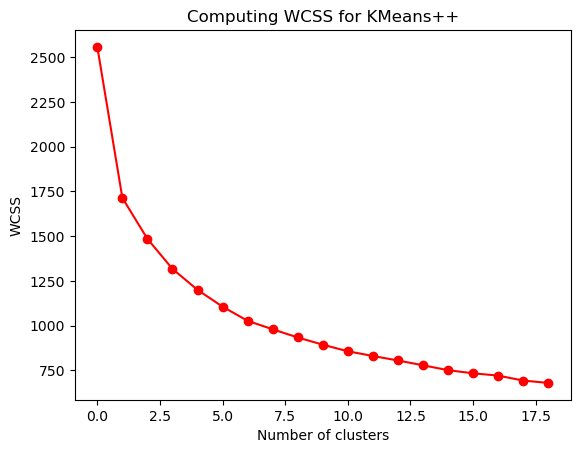

In [35]:
plt.plot(wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Il ne semble pas que la courbe ait une forte inclinaison à un moment donné, le nombre de clusters n'est donc pas évident à définir. On va utiliser une autre méthode pour regarder.

##### Combien de clusters choisir? Silhouette méthode 

In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples
liste_score = []
liste = range(2,20,1)
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    preds = kmeans.fit_predict(boost)
    score = silhouette_score(boost, preds, metric='euclidean')
    liste_score.append(score)

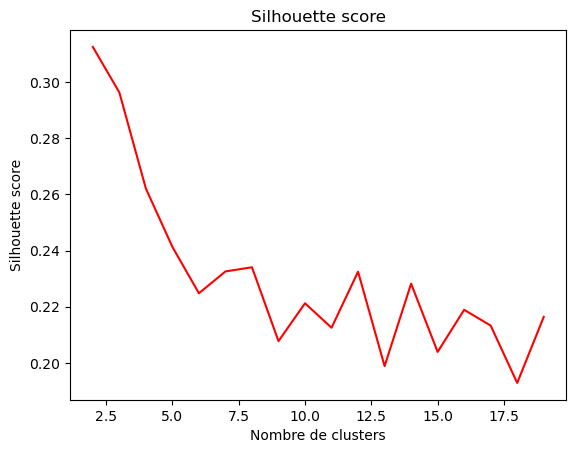

In [37]:
plt.plot(liste,liste_score, 'r')
plt.title("Silhouette score")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette score")
plt.show()

In [39]:
"Nombre de clusters avec le plus haut silhouette score : " + str(print(liste[np.argmax(liste_score)]))

2


'Nombre de clusters avec le plus haut silhouette score : None'

In [40]:
from yellowbrick.cluster import KElbowVisualizer

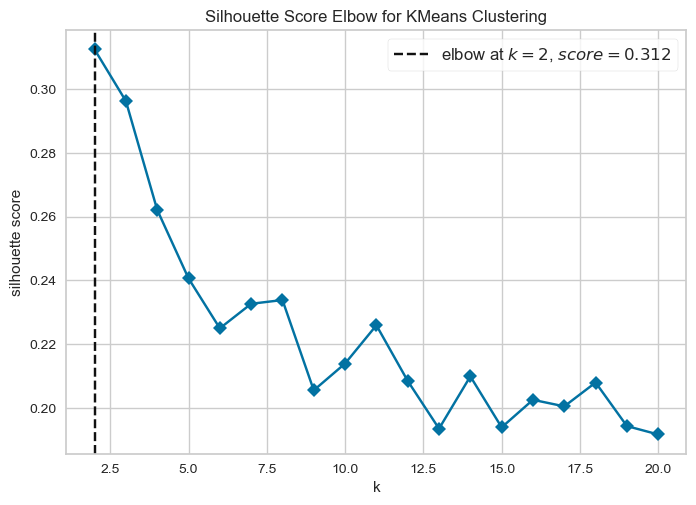

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [41]:
model= KMeans(n_clusters=liste[np.argmax(liste_score)], random_state=300)
visualizer = KElbowVisualizer(model, k=(2,21),metric ='silhouette', timings=False)
visualizer.fit(boost) # Fit the training data to the visualizer
visualizer.poof() 

Il semble que pour faire de la typologie de client, 2 clusters ne soient pas suffisants. Nous avons décidé d'en prendre 4 à la vue de l'objectif de l'étude et après avoir consulté d'autres études de clustering faites sur ce dataset.

In [42]:
nb_cluster = 4

In [43]:
model_kmean= KMeans(n_clusters=nb_cluster, random_state=100)
model_kmean.fit(train)
centers = model_kmean.cluster_centers_
label = model_kmean.labels_

In [44]:
resultats['Kmeans'] = label

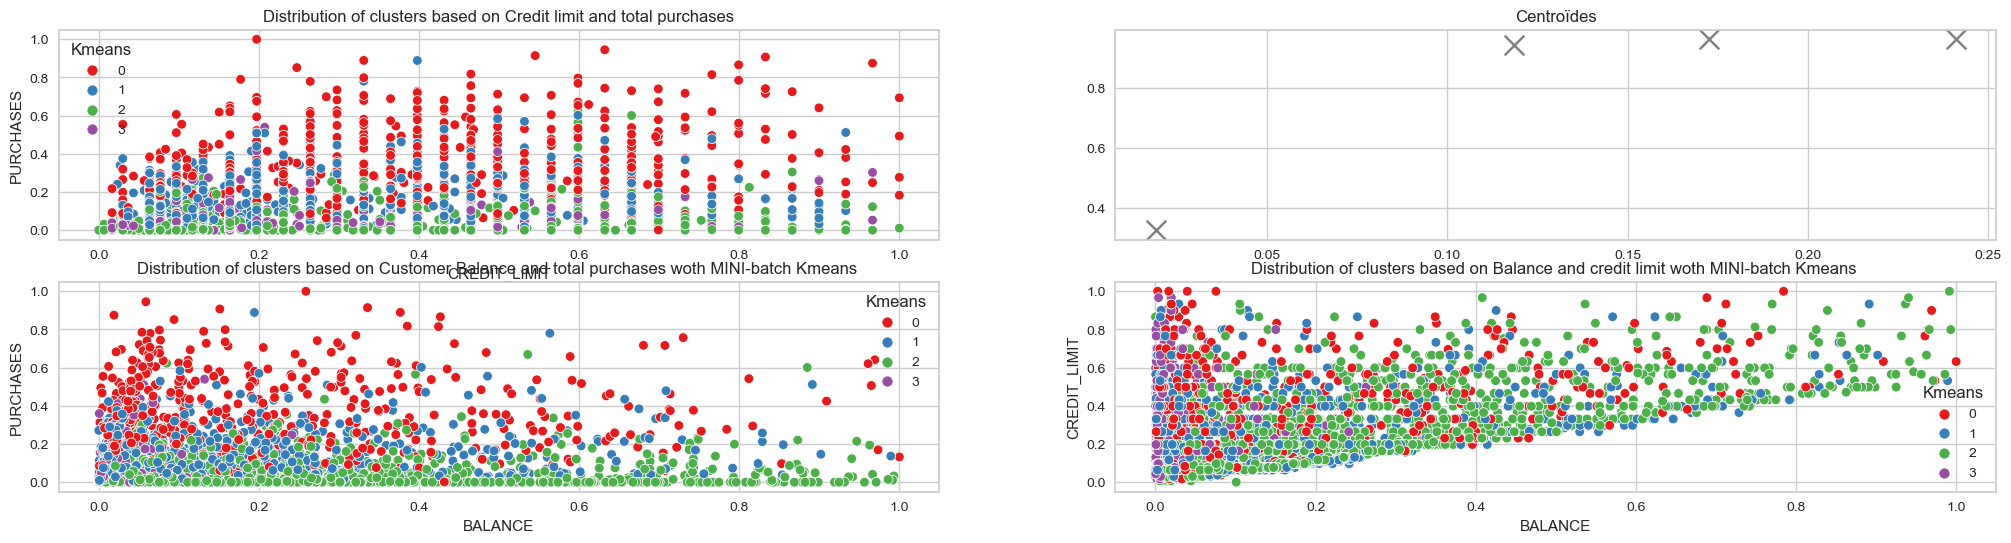

In [45]:
plt.figure(figsize=(25,6))

plt.subplot(2, 2, 1)
sns.scatterplot(data=train, x='CREDIT_LIMIT', y='PURCHASES', hue=resultats['Kmeans'],palette='Set1')
plt.title('Distribution of clusters based on Credit limit and total purchases')

plt.subplot(2, 2,3)
sns.scatterplot(data=train, x='BALANCE', y='PURCHASES', hue=resultats['Kmeans'],palette='Set1')
plt.title('Distribution of clusters based on Customer Balance and total purchases woth MINI-batch Kmeans ')


plt.subplot(2, 2, 4)
sns.scatterplot(data=train, x='BALANCE', y='CREDIT_LIMIT', hue=resultats['Kmeans'],palette='Set1')
plt.title('Distribution of clusters based on Balance and credit limit woth MINI-batch Kmeans ')


plt.subplot(2, 2, 2)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker = 'x' )
plt.title('Centroïdes')
plt.show()


--------------------------------------------------------------------------


### MINI-BATCH Kmeans

On conserve le meme nombre de clusters trouvés pour les Kmeans

In [46]:
random_state_seed = 100
model= MiniBatchKMeans(n_clusters=nb_cluster, random_state=100)
model.fit(train)

MiniBatchKMeans(n_clusters=4, random_state=100)

In [47]:
resultats['mini_Kmeans'] = model.labels_

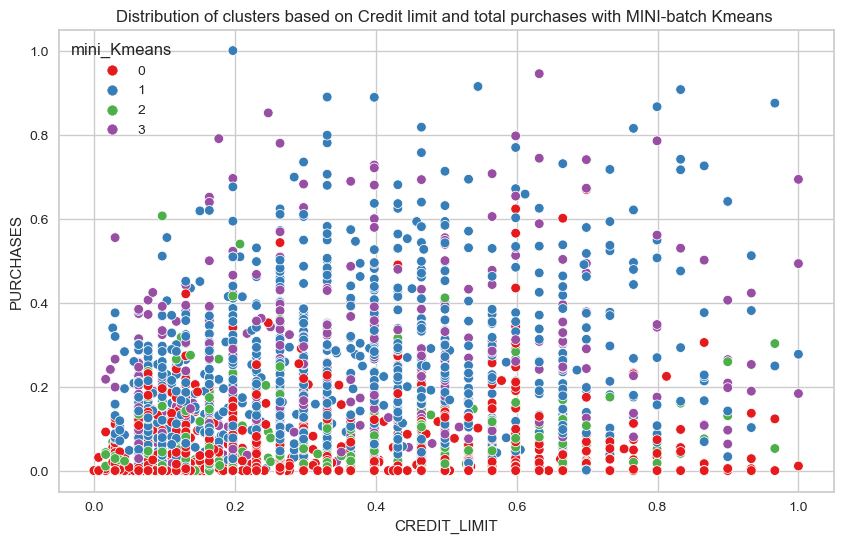

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x='CREDIT_LIMIT', y='PURCHASES', hue=resultats['mini_Kmeans'],palette='Set1')
plt.title('Distribution of clusters based on Credit limit and total purchases with MINI-batch Kmeans ')
plt.show()

---------------------------------------------------------------------------

### OPTICS

On souhaite avoir le même nombre de clusters qu'avec la méthode de Kmeans, donc on va chercher la valeur de max_eps qui permet d'avoir 4 labels.

In [50]:
eps = []
nb_labels = []

for i in np.arange(0.001,0.01,0.001):
    eps.append(i)
    optics_test = OPTICS(min_samples=2, max_eps=i)
    lab = optics_test.fit(train).labels_
    nb_labels.append(len(np.unique(lab)))


In [51]:
max_eps = eps[nb_labels.index(4)]

In [52]:
optics = OPTICS(min_samples=2, max_eps=max_eps)
optics.fit(train)

resultats['optics'] = optics.labels_

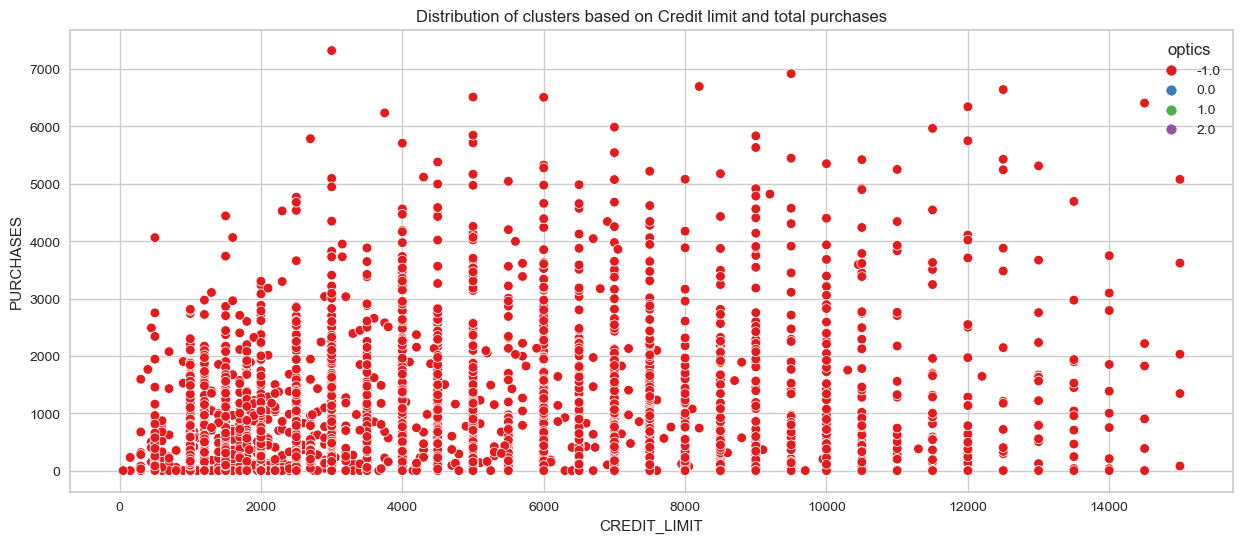

In [53]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df_new, x='CREDIT_LIMIT', y='PURCHASES', hue=resultats['optics'],palette='Set1')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

### Gaussian mixture

In [54]:
from sklearn.mixture import GaussianMixture

myData=pd.DataFrame(train,columns=['x','y'])
gmm = GaussianMixture(n_components=4)
gmm.fit(train)
hue = gmm.predict(train)
y_predict_proba=gmm.predict_proba(train)
pd.DataFrame(y_predict_proba)

,0,1,2,3
0,1.047925e-08,1.000000e+00,0.000000,0.000000
1,1.456004e-09,1.000000e+00,0.000000,0.000000
2,2.546386e-15,0.000000e+00,0.000000,1.000000
3,1.000000e+00,0.000000e+00,0.000000,0.000000
4,1.002564e-10,4.735449e-02,0.000000,0.952646
...,...,...,...,...
4309,3.710520e-15,6.045367e-07,0.999999,0.000000
4310,1.799254e-15,8.108043e-07,0.999999,0.000000
4311,1.000000e+00,0.000000e+00,0.000000,0.000000
4312,1.740846e-11,1.080401e-02,0.000000,0.989196


<AxesSubplot: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

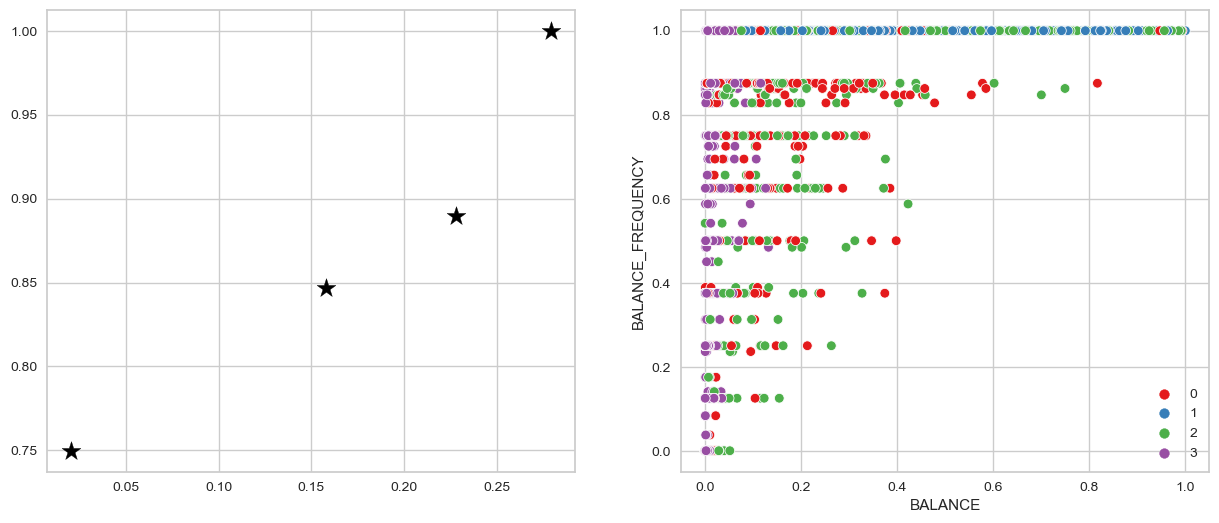

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], marker='*', s=200, c='black')

plt.subplot(1,2,2)
sns.scatterplot(x = train.iloc[:,0],y = train.iloc[:,1],hue=hue,legend='full', palette='Set1')

In [56]:
resultats["gaussien"] = hue

### Résultats : comparaison des résultats

<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

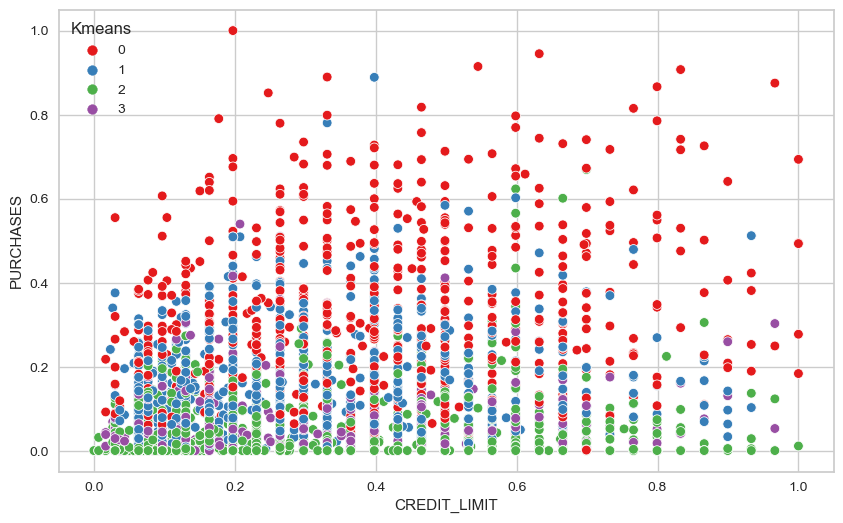

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x='CREDIT_LIMIT', y='PURCHASES', hue=resultats['Kmeans'],palette='Set1')

<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

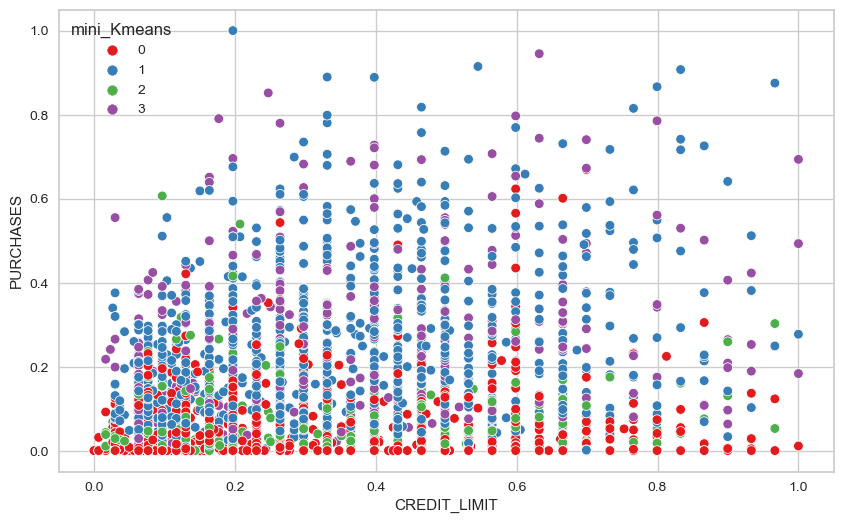

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x='CREDIT_LIMIT', y='PURCHASES', hue=resultats['mini_Kmeans'],palette='Set1')

<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

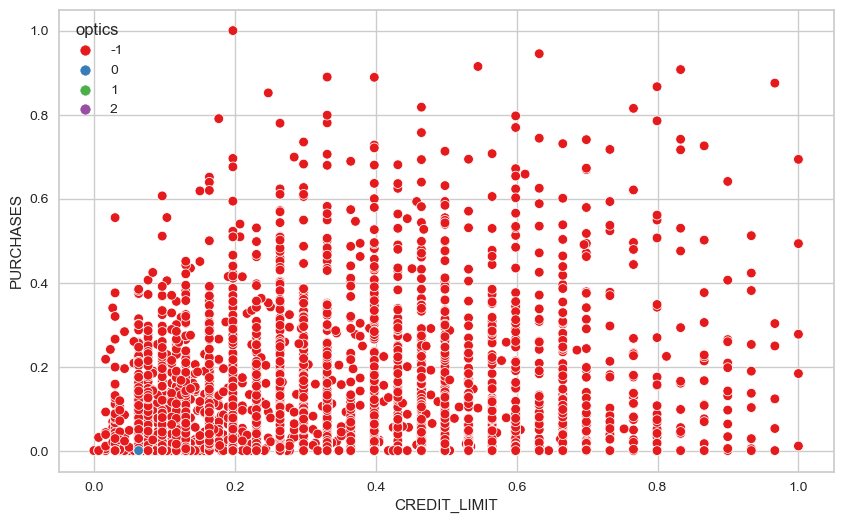

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x='CREDIT_LIMIT', y='PURCHASES', hue=resultats['optics'],palette='Set1')

Visiblement nous avons eu un souci avec la méthode OPTICS qui survalorise une classe au dépend des autres.

<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

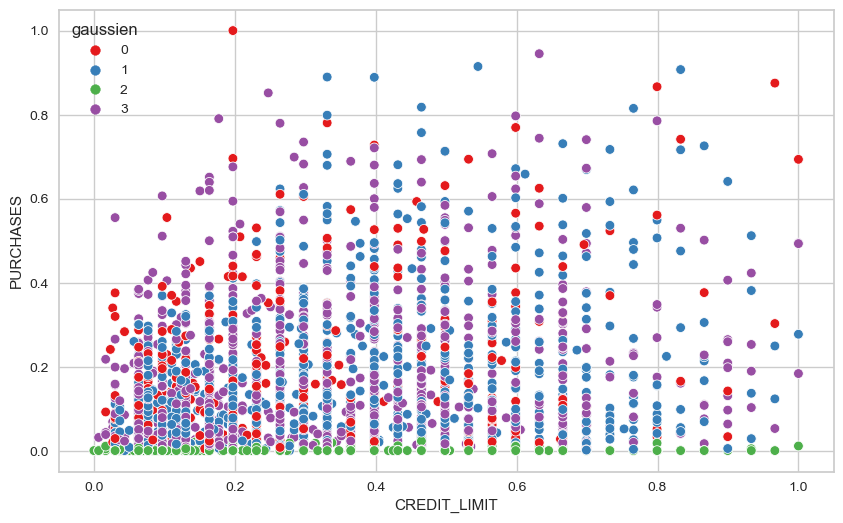

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x='CREDIT_LIMIT', y='PURCHASES', hue=resultats['gaussien'],palette='Set1')